# Experiment - 5: Support Vector Machines

Create and test a classification model using Support Vector Machines to classify a cancer patient sample as benign (value=2) or malignant (value=4).

Dataset: cell_samples.csv

Below is the description of features


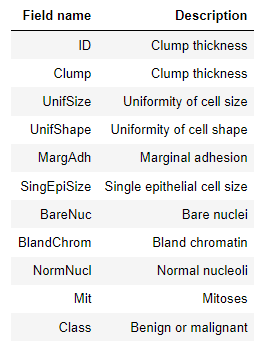

# Import necessary libraries

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Load data

In [2]:
df=pd.read_csv('/content/cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.shape

(699, 11)

# Data Pre-processing

One should always check the datatype

In [4]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

Converting 'object' datatype to numeric datatype.

In [25]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [11]:
X = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

In [13]:
Y= df['Class']

# Train test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


# Training

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.   Linear
2.   Polynomial
3.   Radial Basis Function
4.   Sigmoid

General approach is to choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [18]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

# Prediction

In [19]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

# Evaluation

In [24]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
cnf_matrix

array([[85,  5],
       [ 0, 47]])

I am uploading below image just to show how confusion matrix can be interpreted. Student assignment is to try generating below confusion matrix using code.

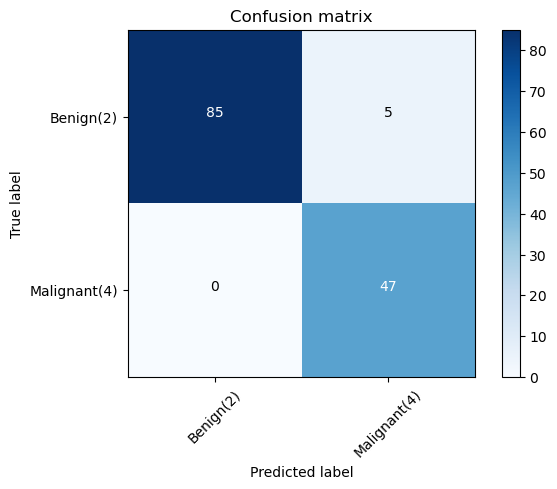